In [1]:
# Imports
import json
import pandas as pd
import numpy as np
import mplfinance as mpf

from datetime import datetime

%matplotlib inline

In [2]:
with open('../dump/EUR_USD-H1-candles.json') as f:
    raw_json_data = f.read()

json_data = json.loads(raw_json_data)

instrument = json_data['instrument']
granularity = json_data['granularity']
candles = json_data['candles']

print(f"{instrument} ({granularity}) candles")
print(f"Sample candle data: {candles[0]}")

EUR_USD (H1) candles
Sample candle data: {'complete': True, 'volume': 5411, 'time': '2022-04-26T18:00:00.000000000Z', 'mid': {'o': '1.06468', 'h': '1.06514', 'l': '1.06406', 'c': '1.06448'}}


In [3]:
# Convert json data to dataframe
flatten_data = [
    [ 
        datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
        bool(x['complete']), 
        int(x['volume']), 
        float(x['mid']['o']), 
        float(x['mid']['h']), 
        float(x['mid']['l']), 
        float(x['mid']['c'])
    ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time','complete', 'Volume', 'Open', 'High', 'Low', 'Close'])

print(f"df shape: {df.shape}")

print(df.info())

df shape: (500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      500 non-null    datetime64[ns]
 1   complete  500 non-null    bool          
 2   Volume    500 non-null    int64         
 3   Open      500 non-null    float64       
 4   High      500 non-null    float64       
 5   Low       500 non-null    float64       
 6   Close     500 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 24.1 KB
None


In [4]:
df['ma4'] = df['Close'].rolling(8).mean()
df['ma12'] = df['Close'].rolling(8).mean()
df['ewm4'] = df['Close'].ewm(span=4, adjust=False).mean()
df['ewm4'] = df['Close'].ewm(span=12, adjust=False).mean()
df.head(30)

,time,complete,Volume,Open,High,Low,Close,ma4,ma12,ewm4
0,2022-04-26 18:00:00,True,5411,1.06468,1.06514,1.06406,1.06448,NaN,NaN,1.064480
1,2022-04-26 19:00:00,True,5176,1.06448,1.06477,1.06382,1.06440,NaN,NaN,1.064468
2,2022-04-26 20:00:00,True,2509,1.06441,1.06441,1.06356,1.06368,NaN,NaN,1.064347
3,2022-04-26 21:00:00,True,638,1.06372,1.06404,1.06355,1.06392,NaN,NaN,1.064281
4,2022-04-26 22:00:00,True,3500,1.06392,1.06458,1.06350,1.06448,NaN,NaN,1.064312
5,2022-04-26 23:00:00,True,3436,1.06451,1.06480,1.06424,1.06428,NaN,NaN,1.064307
6,2022-04-27 00:00:00,True,5302,1.06428,1.06468,1.06348,1.06436,NaN,NaN,1.064315
7,2022-04-27 01:00:00,True,7710,1.06435,1.06470,1.06360,1.06469,1.064286,1.064286,1.064373
8,2022-04-27 02:00:00,True,6543,1.06468,1.06536,1.06342,1.06347,1.064160,1.064160,1.064234
9,2022-04-27 03:00:00,True,5533,1.06346,1.06442,1.06338,1.06408,1.064120,1.064120,1.064210


In [5]:
# Set styles 
#  mpf.available_styles()
# Color reference: https://matplotlib.org/stable/gallery/color/named_colors.html

mc = mpf.make_marketcolors(
    up='g', down='r',
    edge='lime',
    wick={'up':'blue','down':'orange'},
    volume='gray',
    ohlc='black')

s  = mpf.make_mpf_style(
    base_mpf_style='charles',
    mavcolors=['fuchsia','g','r'],
    #mavcolors=['#1f77b4','#ff7f0e','#2ca02c'],
    #marketcolors=mc
    )

dfx = df.tail(50).set_index('time')


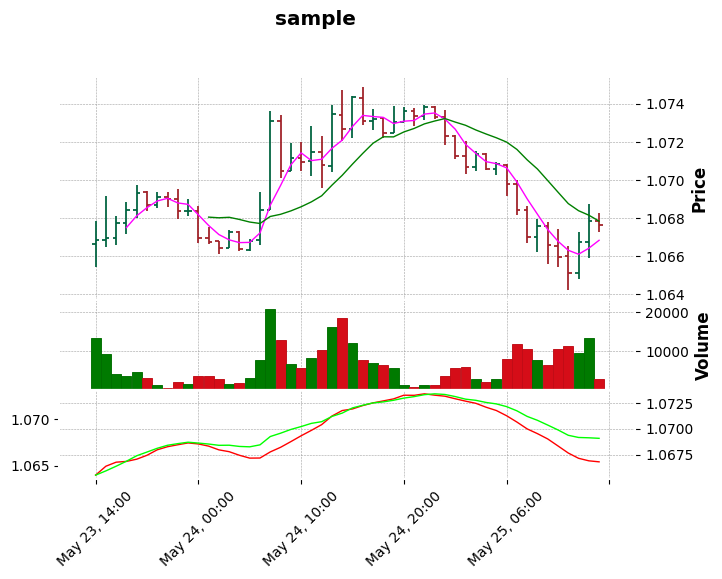

In [7]:

ap0 = [ 
    mpf.make_addplot(dfx['ma4'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm4'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

mpf.plot(dfx, type='ohlc',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    #hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))